# Human Activity Recognition

In [1]:
#Import all the required libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data...
train = pd.read_csv("C:\\Users\\bhara\\Downloads\\human-activity-recognition-with-smartphones (1)\\train.csv")
test = pd.read_csv("C:\\Users\\bhara\\Downloads\\human-activity-recognition-with-smartphones (1)\\test.csv")

In [3]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
tBodyAcc-std()-Z,7352.0,-0.604754,0.418687,-1.000000,-0.980233,-0.859365,-0.262415,1.000000
tBodyAcc-mad()-X,7352.0,-0.630512,0.424073,-1.000000,-0.993591,-0.950709,-0.292680,1.000000
tBodyAcc-mad()-Y,7352.0,-0.526907,0.485942,-1.000000,-0.978162,-0.857328,-0.066701,0.967664
tBodyAcc-mad()-Z,7352.0,-0.606150,0.414122,-1.000000,-0.980251,-0.857143,-0.265671,1.000000
tBodyAcc-max()-X,7352.0,-0.468604,0.544547,-1.000000,-0.936219,-0.881637,-0.017129,1.000000


In [8]:
train.isnull().sum().any()

False

In [9]:
#get all the numaric values
train_num = train._get_numeric_data()

In [10]:
train_num.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

In [11]:
#get all the categorical attributes
train_cat = train.drop(train_num.columns,axis = 1)

In [12]:
train_cat.columns

Index(['Activity'], dtype='object')

In [13]:
#Lets seperate test num_cols and cat_cols
test_num = test._get_numeric_data()
test_cat = test.drop(test_num.columns,axis = 1)

In [14]:
test_cat.columns

Index(['Activity'], dtype='object')

In [15]:
test_num.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

# Lable Encoding

In [16]:
for i in train_cat:
    train_cat[i] = train_cat[i].astype('category')

In [17]:
for i in test_cat:
    test_cat[i] = test_cat[i].astype('category')

In [18]:
for i in train_cat:
    train_cat[i] =train_cat[i].cat.codes

In [19]:
for i in test_cat:
    test_cat[i] =test_cat[i].cat.codes

In [20]:
train_cat.head(4)

,Activity
0,2
1,2
2,2
3,2


In [21]:
test_cat.head(4)

,Activity
0,2
1,2
2,2
3,2


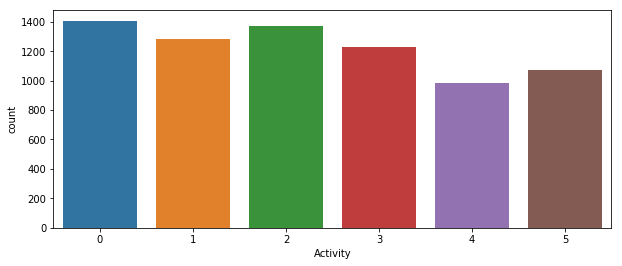

In [22]:
plt.subplots(figsize=(10,4))
sns.countplot(train_cat['Activity'])

In [23]:
train_HAR = pd.concat([train_num,train_cat],axis = 1)
test_HAR = pd.concat([test_num,test_cat],axis=1)

In [24]:
train_HAR.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2


In [25]:
test_HAR.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,2


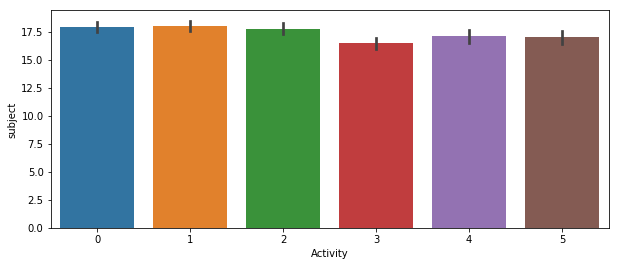

In [26]:
plt.subplots(figsize = (10,4))
sns.barplot(x =train_HAR['Activity'], y= train_HAR['subject'])

In [27]:
human_activity= pd.concat([train_HAR,test_HAR],axis =0)

In [28]:
human_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), int8(1)
memory usage: 44.2 MB


In [29]:
X =human_activity.drop(['Activity'],axis =1)
Y =human_activity.Activity

# Using PCA lets solve the problem

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)                
t_train = scaler.transform(X)

In [31]:
pca_har = PCA(0.99)
x_fit = pca_har.fit_transform(t_train)
print (t_train.shape, x_fit.shape)

(10299, 562) (10299, 182)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_fit,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
X_train , X_test, Y_train, Y_test = train_test_split(
        x_fit,
        Y,
        test_size=0.20,
        random_state=123)

In [34]:
y_pred = log.predict(X_test)

In [35]:
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred)

0.98689320388349511

Text(0.5,15,'Predicted label')

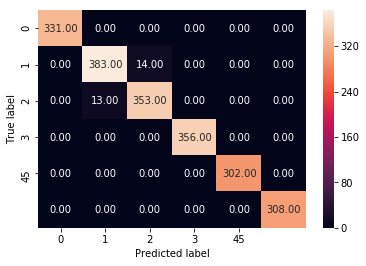

In [36]:
cm = metrics.confu                              y_pred, [0,1,2,3,4,5])
sns.heatmap(cm, annotsion_matrix(Y_test,
=True,  fmt='.2f', xticklabels = ["0","1","2","3","4" "5"] , yticklabels =  ["0","1","2","3","4" "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Decission Tree classifier

In [37]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export 
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeClassifier(max_depth=depth)
    dt_obj.fit(X_train, Y_train)
    print ('depth:', depth, 'Accuracy:', metrics.accuracy_score(Y_test, dt_obj.predict(X_test)))

depth: 1 Accuracy: 0.332038834951
depth: 2 Accuracy: 0.583980582524
depth: 3 Accuracy: 0.721359223301
depth: 4 Accuracy: 0.740291262136
depth: 5 Accuracy: 0.775242718447
depth: 6 Accuracy: 0.799514563107
depth: 7 Accuracy: 0.825242718447
depth: 8 Accuracy: 0.823300970874
depth: 9 Accuracy: 0.829611650485
depth: 10 Accuracy: 0.829611650485
depth: 11 Accuracy: 0.827184466019
depth: 12 Accuracy: 0.826213592233
depth: 13 Accuracy: 0.823786407767
depth: 14 Accuracy: 0.819902912621
depth: 15 Accuracy: 0.822815533981
depth: 16 Accuracy: 0.821359223301
depth: 17 Accuracy: 0.818932038835
depth: 18 Accuracy: 0.819902912621
depth: 19 Accuracy: 0.81213592233


In [39]:
param_grid = {'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
tree.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
tree.best_params_

{'max_depth': 8}

In [41]:
tree.best_score_

0.8397863818424566

In [42]:
tree_final = DecisionTreeClassifier(max_depth=8)
tree_final.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
tree_test_pred = pd.DataFrame({'actual': Y_test, 'predicted': tree_final.predict(X_test)})

In [44]:
metrics.accuracy_score(Y_test, tree_test_pred.predicted)

0.81941747572815538

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
